In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import os
%matplotlib inline

In [62]:
data = pd.read_csv('C:/Users/shahs/Desktop/Rutgers/Sem 2/DAV/BlackFriday.csv')

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [64]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


- Analyzing data for research
○ Who is more likely to spend more in a black Friday sale?
    - Men or Women.
    - Married or Un Married
   
○ Which type of products are more likely to be sold in a sale like black Friday?
○ Which type of products are common among men and which among women?

Prediction/classification- 
○ Predict Age of a customer based on the rest of available data. 
○ Predict gender of a customer based on rest of data. 
○ Predict amount of purchase based on rest of data.

Recommendation - 
○ Suggest products based on age. 
○ Suggest products based on location customers belong to.
○ Suggest products based on gender.

In [65]:
data.isna().any().any()

True

In [66]:
data.isna().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

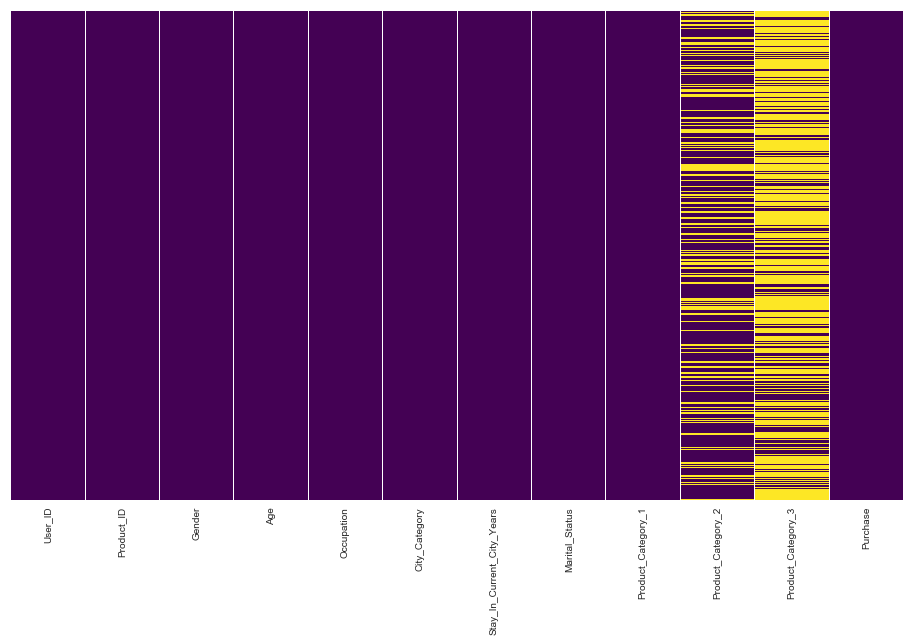

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,9))
sns.heatmap(data.isnull(),cmap="viridis",cbar=False,yticklabels=False)

In [67]:
data['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [68]:
data['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [69]:
pc2 = data['Product_Category_2'].mean()
data['Product_Category_2'].fillna(value = pc2, inplace = True)
pc3 = data['Product_Category_3'].mean()
data['Product_Category_3'].fillna(value = pc3, inplace = True)
data.isna().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2            False
Product_Category_3            False
Purchase                      False
dtype: bool

In [70]:
data["Product_Category_2"] = data["Product_Category_2"].astype(int)
data["Product_Category_3"] = data["Product_Category_3"].astype(int)

In [71]:
print('Unique Values for Each Feature: \n')
for i in data.columns:
    print(i, ':',data[i].nunique())

Unique Values for Each Feature: 

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Product_Category_2 : 17
Product_Category_3 : 15
Purchase : 17959


In [72]:
data.groupby('Gender')['Gender'].count()

Gender
F    132197
M    405380
Name: Gender, dtype: int64

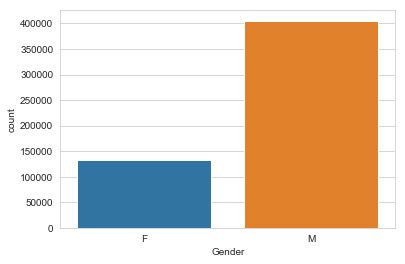

In [245]:
sns.countplot(data['Gender'])

In [246]:
data.groupby('Age')['Age'].count()

Age
0-17      14707
18-25     97634
26-35    214690
36-45    107499
46-50     44526
51-55     37618
55+       20903
Name: Age, dtype: int64

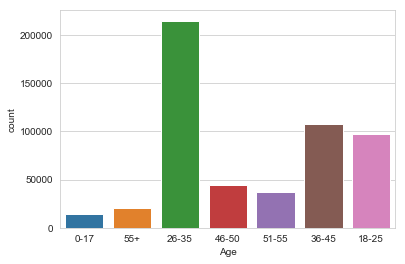

In [247]:
sns.countplot(data['Age'])

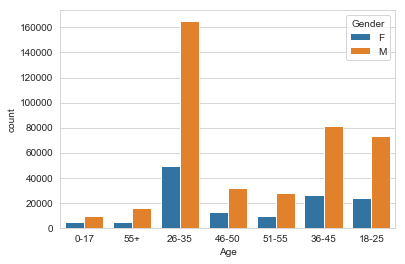

In [248]:
sns.countplot(data['Age'], hue=data['Gender'])

In [73]:
data['MG'] = data.apply(lambda x  : '%s%s' % (x['Gender'],x['Marital_Status']), axis = 1)
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,MG
0,1000001,P00069042,F,0-17,10,A,2,0,3,9,12,8370,F0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200,F0
2,1000001,P00087842,F,0-17,10,A,2,0,12,9,12,1422,F0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,12,1057,F0
4,1000002,P00285442,M,55+,16,C,4+,0,8,9,12,7969,M0


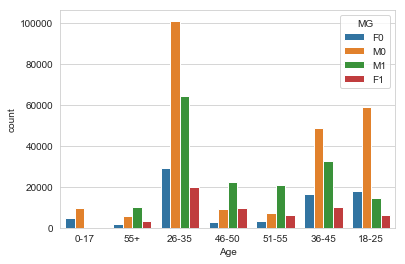

In [250]:
sns.countplot(data['Age'],hue=data['MG'])

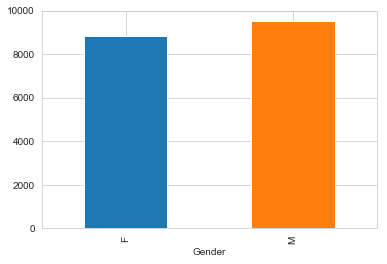

In [251]:
data.groupby('Gender')['Purchase'].mean().plot.bar()

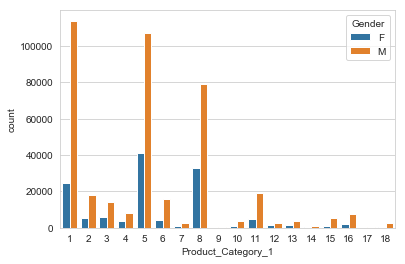

In [252]:
sns.countplot(data['Product_Category_1'],hue=data['Gender'])

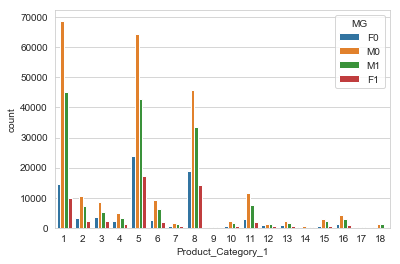

In [253]:
sns.countplot(data['Product_Category_1'],hue=data['MG'])

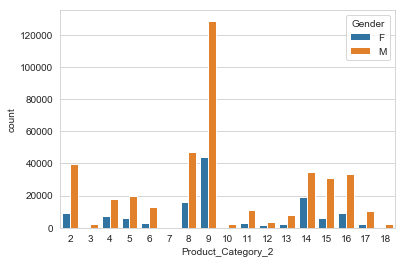

In [254]:
sns.countplot(data['Product_Category_2'],hue=data['Gender'])

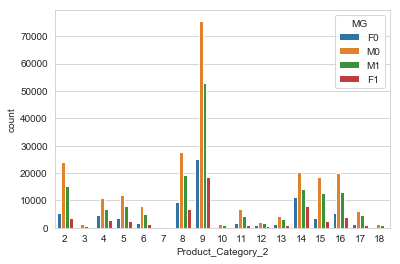

In [255]:
sns.countplot(data['Product_Category_2'],hue=data['MG'])

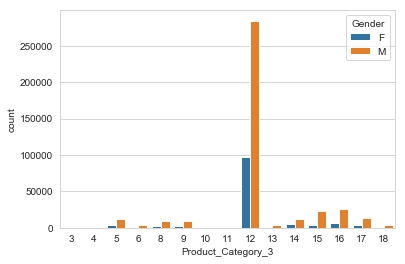

In [256]:
sns.countplot(data['Product_Category_3'],hue=data['Gender'])

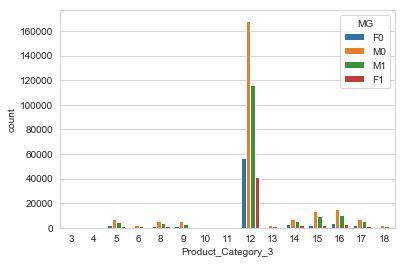

In [257]:
sns.countplot(data['Product_Category_3'],hue=data['MG'])

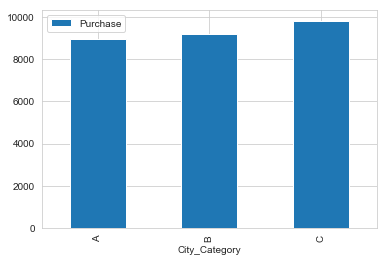

In [258]:
data[['City_Category', 'Purchase']].groupby('City_Category').mean().plot.bar()

In [74]:
data['Product_Category_2'] = data['Product_Category_2'].astype(int)
data['Product_Category_3'] = data['Product_Category_3'].astype(int)
data.Stay_In_Current_City_Years = data.Stay_In_Current_City_Years.replace('4+',4)
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].astype(int)

X = data.iloc[:,2:11].values
y = data.iloc[:,11].values

lb_x_1 = LabelEncoder()
X[:,0] = lb_x_1.fit_transform(X[:,0])
lb_x_2 = LabelEncoder()
X[:,1] = lb_x_2.fit_transform(X[:,1])
lb_x_4 = LabelEncoder()
X[:,3] = lb_x_2.fit_transform(X[:,3])
lb_x_3 = LabelEncoder()
X[:,2] = lb_x_3.fit_transform(X[:,2])

onh = OneHotEncoder(categorical_features=[1,2,3])
X = onh.fit_transform(X).toarray()

C:\Users\shahs\aa\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\shahs\aa\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [76]:
X = data.iloc[:,2:-1].values
y = data.iloc[:, -1].values

X

array([['F', '0-17', 10, ..., 9, 12, 8370],
       ['F', '0-17', 10, ..., 6, 14, 15200],
       ['F', '0-17', 10, ..., 9, 12, 1422],
       ...,
       ['M', '36-45', 16, ..., 15, 12, 8043],
       ['M', '36-45', 16, ..., 9, 12, 7172],
       ['M', '36-45', 16, ..., 8, 12, 6875]], dtype=object)

In [77]:
y

array(['F0', 'F0', 'F0', ..., 'M0', 'M0', 'M0'], dtype=object)

In [78]:
# Encoding categorical data

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 0] = labelencoder_X_1.fit_transform(X[:, 0])
labelencoder_X_2 = LabelEncoder()
X[:, 1] = labelencoder_X_2.fit_transform(X[:, 1])
labelencoder_X_3 = LabelEncoder()
X[:, 3] = labelencoder_X_3.fit_transform(X[:, 3])
labelencoder_X_4 = LabelEncoder()
X[:, 4] = labelencoder_X_4.fit_transform(X[:, 4])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:,1:]

C:\Users\shahs\aa\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\shahs\aa\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [79]:
X

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 9.000e+00, 1.200e+01,
        8.370e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 6.000e+00, 1.400e+01,
        1.520e+04],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 9.000e+00, 1.200e+01,
        1.422e+03],
       ...,
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 1.500e+01, 1.200e+01,
        8.043e+03],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 9.000e+00, 1.200e+01,
        7.172e+03],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 8.000e+00, 1.200e+01,
        6.875e+03]])

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 13 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null int32
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null int32
Product_Category_3            537577 non-null int32
Purchase                      537577 non-null int64
MG                            537577 non-null object
dtypes: int32(3), int64(5), object(5)
memory usage: 47.2+ MB


In [81]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [334]:
# Feature Scaling

from  sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [335]:
# Fitting Multiple Linear Regression to the Training set

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [336]:
# Predicting the Test set results

y_pred = regressor.predict(X_test)

In [337]:
# Mean Squared Error

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

22030405.299776018

In [338]:
# Fitting Polynomial Regression to the dataset

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [339]:
# Predicting the Test set results
y_pred = regressor.predict(poly_reg.fit_transform(X_test))

In [340]:
# Mean Squared Error

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

17397666.801793925

In [341]:
# Fitting Random Forest Regression to the dataset

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 600, random_state = 0)
regressor.fit(X_train, y_train)

# I tried other "n_estimators" values and figure out that the number "600" is the better.

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [342]:
y_pred = regressor.predict(X_test)

In [343]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

9213311.171636926

In [344]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score = reg.score(X_test,y_test)
r2_score

0.10873348109153025

In [345]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(X_train,y_train)
r2_score = reg.score(X_test,y_test)
r2_score

0.553359032514354

In [82]:
#drop product ID - we don't need it for purchase quantity
data.drop(columns=['Product_ID'],inplace=True)
data.head(7)

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,MG
0,1000001,F,0-17,10,A,2,0,3,9,12,8370,F0
1,1000001,F,0-17,10,A,2,0,1,6,14,15200,F0
2,1000001,F,0-17,10,A,2,0,12,9,12,1422,F0
3,1000001,F,0-17,10,A,2,0,12,14,12,1057,F0
4,1000002,M,55+,16,C,4,0,8,9,12,7969,M0
5,1000003,M,26-35,15,A,3,0,1,2,12,15227,M0
6,1000004,M,46-50,7,B,2,1,1,8,17,19215,M1


In [83]:
data = pd.get_dummies(data,columns=['Gender'])

In [85]:
data = pd.get_dummies(data,columns=['Age','City_Category'])

In [87]:
data = pd.get_dummies(data,columns=['MG'])

In [88]:
train,test = train_test_split(data)
X_train , y_train = train.iloc[:,train.columns!='Purchase'], train[['Purchase']]
X_test , y_test = test.iloc[:,test.columns!='Purchase'], test[['Purchase']]

from sklearn.neighbors import KNeighborsRegressor
clf = KNeighborsRegressor(n_neighbors=12)
clf.fit(X_train,y_train)
r2_score = clf.score(X_test,y_test)
r2_score

0.3453340789378821

In [351]:
data.corr()[['Purchase']].sort_values('Purchase')

,Purchase
Product_Category_1,-0.314125
Product_Category_2,-0.160510
Gender_F,-0.060086
City_Category_A,-0.045780
City_Category_B,-0.023161
Age_0-17,-0.010563
Age_18-25,-0.009331
Stay_In_Current_City_Years_0,-0.006878
Age_26-35,-0.003155
Age_46-50,-0.002955


In [352]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data[['City_Category_C','Gender_M','Occupation','Age_51-55','Age_36-45',
                                 'Stay_In_Current_City_Years_0','Age_55+', 'Purchase']])
print(train.shape)
print(test.shape)

(403182, 8)
(134395, 8)


In [353]:
train,test = train_test_split(data)
X_train , y_train = train.iloc[:,train.columns!='Purchase'], train[['Purchase']]
X_test , y_test = test.iloc[:,test.columns!='Purchase'], test[['Purchase']]

In [354]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score = reg.score(X_test,y_test)
r2_score

0.11378470452378875

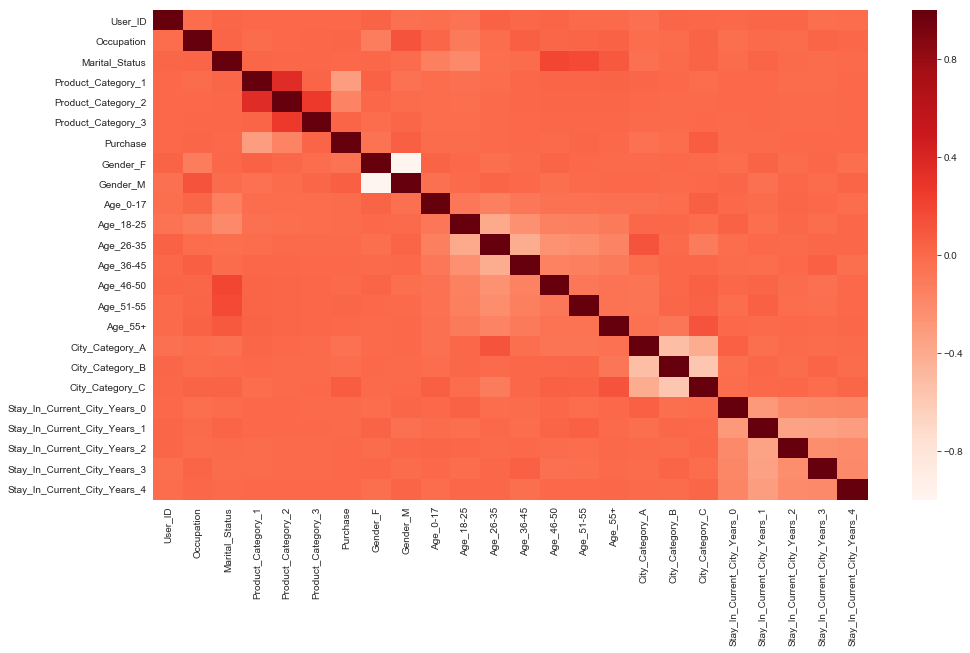

In [355]:
# Find out the important features using heatmap visualization
import matplotlib.pyplot as plt
plt.subplots(figsize=(16,9))
corr = data.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap='Reds')
plt.show()
# City_Category and Gender seem to give positive correlation.

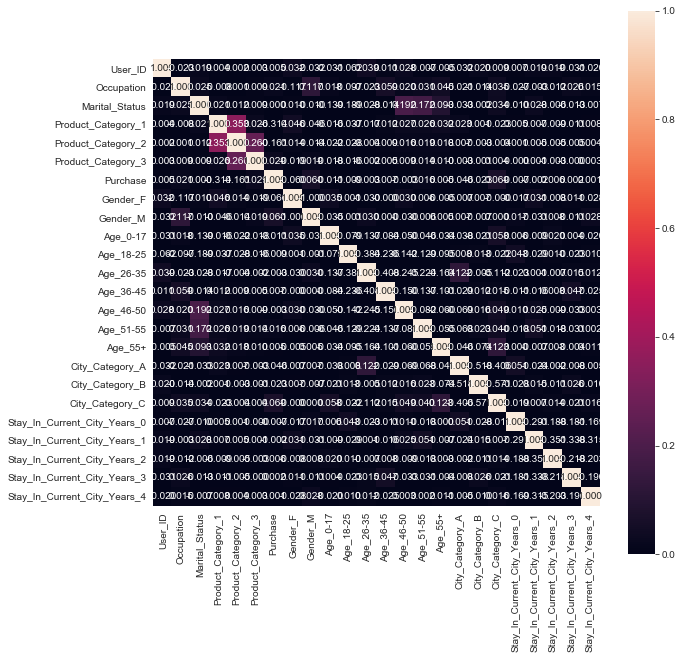

In [356]:
import pylab as pl
#Correlation matrix & Heatmap - Finding correlation
pl.figure(figsize =(10,10))
corrmat = data.corr()
sns.heatmap(corrmat, annot=True, fmt='.3f', vmin=0, vmax=1, square=True);
plt.show()

In [357]:
#Categorization of customers in 4 groups based on their items purchased ammount 
#Category-0: 0-6000
#Category-1: 6000-9333
#Category-2: 9333-13000
#Category-3: 13000-24000

data['category'] = 999
data.loc[np.logical_and(data['Purchase']>0, data['Purchase']<=6000), 'category'] = 0
data.loc[np.logical_and(data['Purchase']>6000, data['Purchase']<=9334), 'category'] = 1
data.loc[np.logical_and(data['Purchase']>9334, data['Purchase']<=13000), 'category'] = 2
data.loc[np.logical_and(data['Purchase']>13000, data['Purchase']<=24000), 'category'] = 3
data.head(10)

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,Age_0-17,...,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4,category
0,1000001,10,0,3,9,12,8370,1,0,1,...,0,1,0,0,0,0,1,0,0,1
1,1000001,10,0,1,6,14,15200,1,0,1,...,0,1,0,0,0,0,1,0,0,3
2,1000001,10,0,12,9,12,1422,1,0,1,...,0,1,0,0,0,0,1,0,0,0
3,1000001,10,0,12,14,12,1057,1,0,1,...,0,1,0,0,0,0,1,0,0,0
4,1000002,16,0,8,9,12,7969,0,1,0,...,1,0,0,1,0,0,0,0,1,1
5,1000003,15,0,1,2,12,15227,0,1,0,...,0,1,0,0,0,0,0,1,0,3
6,1000004,7,1,1,8,17,19215,0,1,0,...,0,0,1,0,0,0,1,0,0,3
7,1000004,7,1,1,15,12,15854,0,1,0,...,0,0,1,0,0,0,1,0,0,3
8,1000004,7,1,1,16,12,15686,0,1,0,...,0,0,1,0,0,0,1,0,0,3
9,1000005,20,1,8,9,12,7871,0,1,0,...,0,1,0,0,0,1,0,0,0,1


In [358]:
#Labels and featureSet columns
columns = data.columns.tolist()
columns = [c for c in columns if c not in ['category']]
target = 'category'

X = data[columns]
y = data[target]

In [359]:
#Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

print("Training FeatureSet:", X_train.shape)
print("Training Labels:", y_train.shape)
print("Testing FeatureSet:", X_test.shape)
print("Testing Labels:", y_test.shape)

Training FeatureSet: (403182, 24)
Training Labels: (403182,)
Testing FeatureSet: (134395, 24)
Testing Labels: (134395,)


In [360]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import linear_model
import warnings

#Initializing the model with some parameters.
model = RandomForestClassifier(n_estimators=100, min_samples_leaf=10, random_state=1)
#Fitting the model to the data.
model.fit(X_train, y_train)
#Generating predictions for the test set.
predictions = model.predict(X_test)
#Computing the Model Accuracy
print("Random Forrest Accuracy:",round(metrics.accuracy_score(y_test, predictions))*100)
#Computing the error.
print("Mean Absoulte Error:", round(mean_absolute_error(predictions, y_test))*100)
#Computing classification Report
print("Classification Report:\n", classification_report(y_test, predictions))
#Plotting confusion matrix
print("Confusion Matrix:")
data = pd.DataFrame(
    confusion_matrix(y_test, predictions),index = [['actual', 'actual', 'actual', 'actual'], ['0','1','2','3']],
    columns = [['predicted', 'predicted', 'predicted', 'predicted'], ['0', '1', '2', '3']])
    
print(data)

Random Forrest Accuracy: 100.0
Mean Absoulte Error: 0.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     36574
           1       1.00      1.00      1.00     43977
           2       1.00      1.00      1.00     23974
           3       1.00      1.00      1.00     29870

   micro avg       1.00      1.00      1.00    134395
   macro avg       1.00      1.00      1.00    134395
weighted avg       1.00      1.00      1.00    134395

Confusion Matrix:
         predicted                     
                 0      1      2      3
actual 0     36574      0      0      0
       1         0  43977      0      0
       2         0      0  23974      0
       3         0      0      0  29870


In [361]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4 entries, (actual, 0) to (actual, 3)
Data columns (total 4 columns):
(predicted, 0)    4 non-null int64
(predicted, 1)    4 non-null int64
(predicted, 2)    4 non-null int64
(predicted, 3)    4 non-null int64
dtypes: int64(4)
memory usage: 208.0+ bytes


In [362]:
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(X_train, y_train)
# Predicting a new result
y_pred = regressor.predict(X_test)

C:\Users\shahs\aa\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [363]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)
accuracies.mean()

C:\Users\shahs\aa\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\shahs\aa\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\shahs\aa\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\shahs\aa\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\shahs\aa\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\shahs\aa\lib\site-packages\xgboost\core.py:587

0.999999998870582

In [364]:
from sklearn.model_selection import GridSearchCV
parameters = [{'eta': [0.01, 0.015, 2], 'max_depth': [3,5,7,9], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'subsample':[ 0.6, 0.8,1], 'colsample_bytree':[ 0.6, 0.8,1]}]
grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets